In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
raw = pd.read_csv('/content/drive/MyDrive/하영/캐글데이터로데이터분석하기/kaggle_survey_2020_responses.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
raw.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool.

In [5]:
question = raw.iloc[0] # 위의 데이터프레임에서 0번째 인덱스 행을 가져옴.
question # 질문내용이 들어감.

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

In [6]:
answer = raw.drop([0]) # 0번째를 제외하고 나머지
answer

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,Visual Studio Code (VSCode),NaN,Spyder,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SAP Analytics Cloud,NaN,NaN,"Automated data augmentation (e.g. imgaug, albu...",NaN,NaN,NaN,Automated hyperparameter tuning (e.g. hyperopt...,Automation of full ML pipelines (e.g. Google C...,NaN,NaN,Google Cloud AutoML,NaN,Databricks AutoML,NaN,NaN,Auto-Keras,Auto-Sklearn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN,R,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,Notepad++,Sublime Text,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Current

In [7]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20036 entries, 1 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 54.4+ MB


# Q1. What is your age (# years)?

In [8]:
question["Q1"]

'What is your age (# years)?'

In [10]:
answer["Q1"] # pandas 시리즈 형태로 가져옴
answer["Q1"].value_counts() # 빈도수를 가져올 수 있다
answer["Q1"].value_counts(normalize=True) * 100 # normalize=True 하면 비율을 볼 수 있다
answer["Q1"].value_counts().sort_index() # 인덱스 순으로 정렬(보통은 많은 순서대로 정렬됨)

18-21    3469
22-24    3786
25-29    4011
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

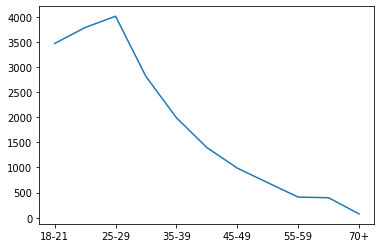

In [13]:
answer["Q1"].value_counts().sort_index().plot()

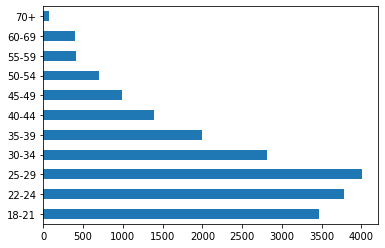

In [14]:
answer["Q1"].value_counts().sort_index().plot.barh()

In [15]:
# 시각화를 위한 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina") # retina 설정

plt.style.use("seaborn-whitegrid") # 스타일 지정

Text(0.5, 1.0, 'What is your age (# years)?')

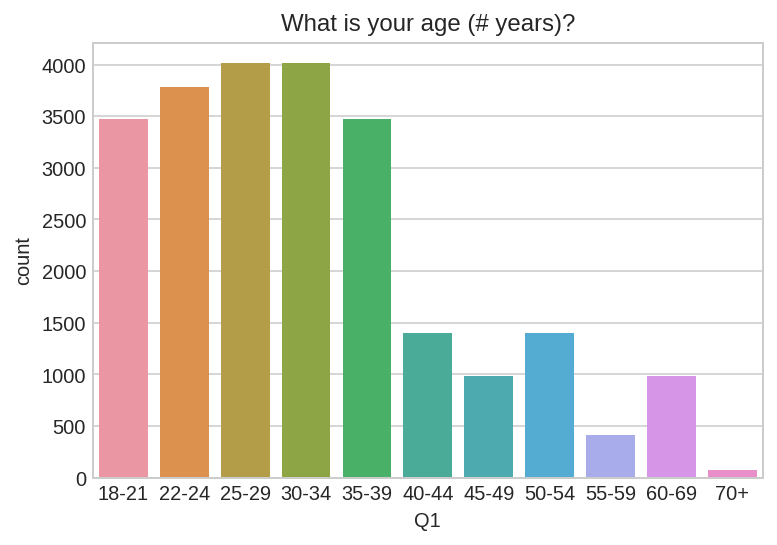

In [22]:
sns.countplot(data=answer, x="Q1")
sns.countplot(data=answer.sort_values("Q1"), x="Q1") # 정렬
sns.countplot(data=answer.sort_values("Q1"), x="Q1").set_title(question["Q1"]) # 타이틀 지정

Text(0.5, 1.0, 'What is your age (# years)?')

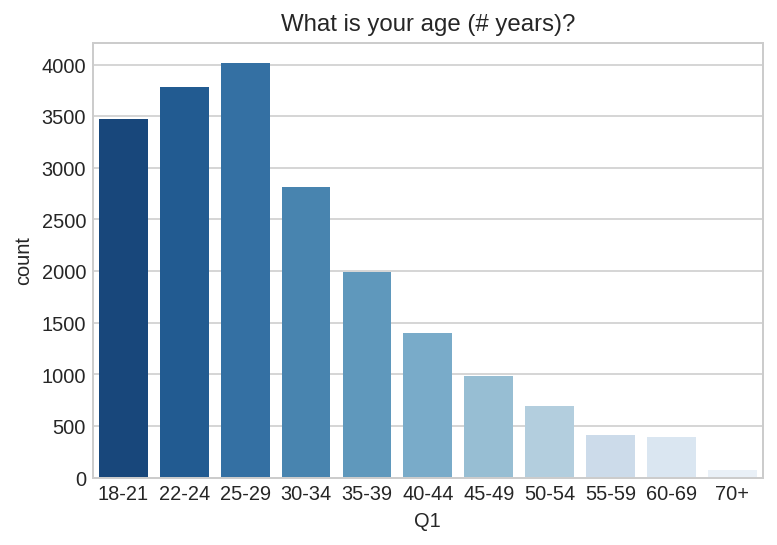

In [21]:
sns.countplot(data=answer.sort_values("Q1"), x="Q1", palette="Blues_r").set_title(question["Q1"]) # 색 지정

# Q2 What is your gender? - Selected Choice

In [23]:
question_no = "Q2"
Q2 = answer[question_no].value_counts()
Q2

Man                        15789
Woman                       3878
Prefer not to say            263
Prefer to self-describe       54
Nonbinary                     52
Name: Q2, dtype: int64

Text(0.5, 1.0, 'What is your gender? - Selected Choice')

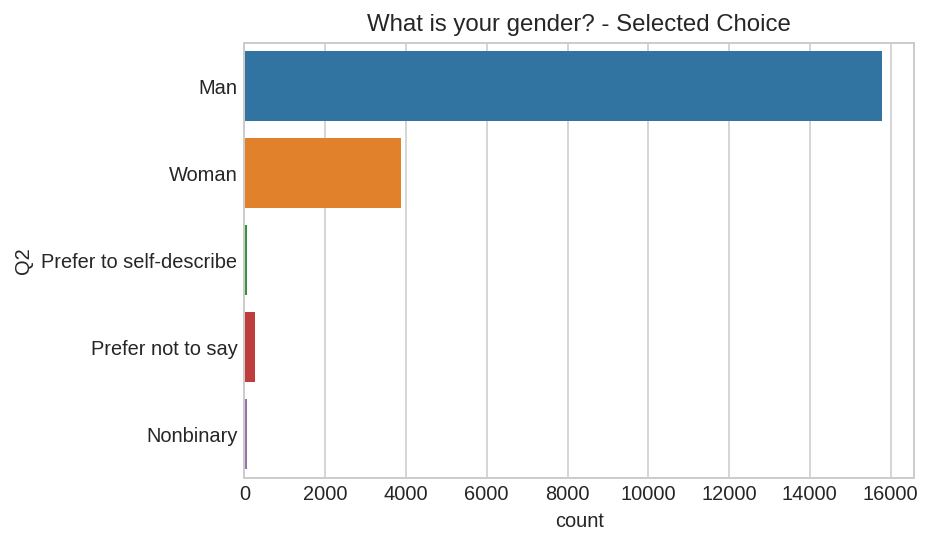

In [24]:
sns.countplot(data=answer, y=question_no).set_title(question[question_no])

In [25]:
answer["Q1"].value_counts()
# answer["Q2"]

25-29    4011
22-24    3786
18-21    3469
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

In [26]:
# 2개의 변수에 대해서 빈도수 세고 싶을 때
q1q2 = pd.crosstab(answer["Q1"], answer["Q2"])
q1q2

Q2,Man,Nonbinary,Prefer not to say,Prefer to self-describe,Woman
Q1,,,,,
18-21,2611,8,42,12,796
22-24,2838,12,41,9,886
25-29,3128,13,42,9,819
30-34,2246,8,44,9,504
35-39,1581,7,33,2,368
40-44,1153,2,15,5,222
45-49,840,1,17,4,126
50-54,605,0,10,2,81
55-59,353,0,13,0,45


In [27]:
# 남녀만 보려면
q1q2[["Man","Woman"]]
q1q2[["Man"]] # 하나일 때도 리스트형태로 하면 데이터프레임 형태로 출력할 수 있다.

Q2,Man
Q1,
18-21,2611
22-24,2838
25-29,3128
30-34,2246
35-39,1581
40-44,1153
45-49,840
50-54,605
55-59,353


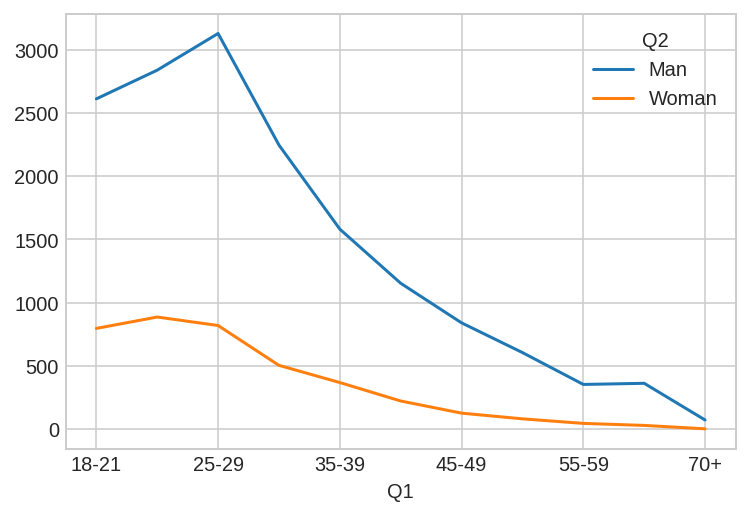

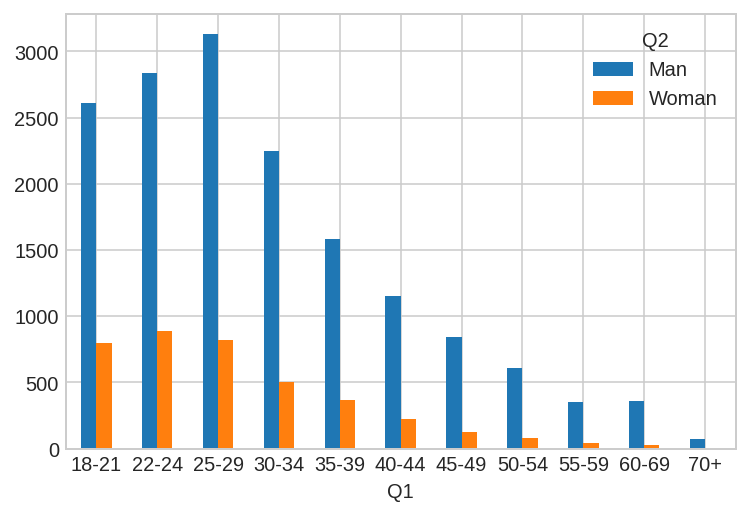

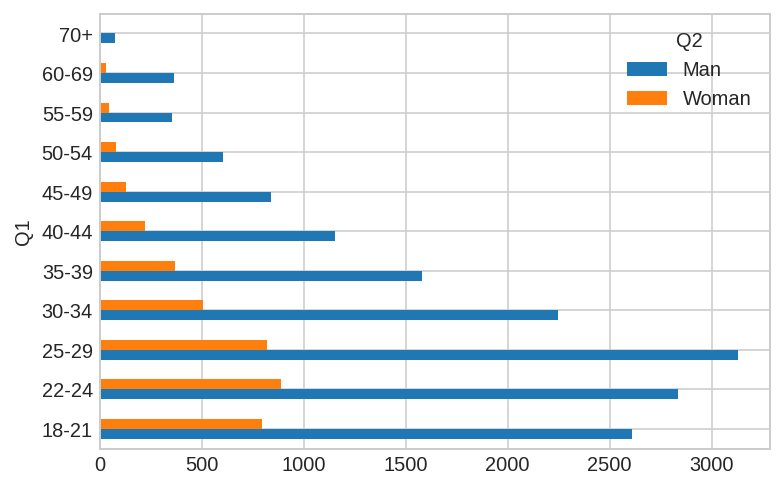

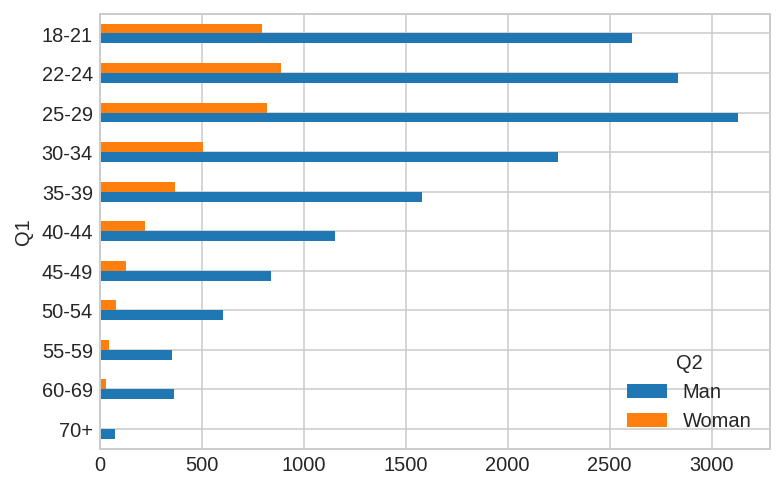

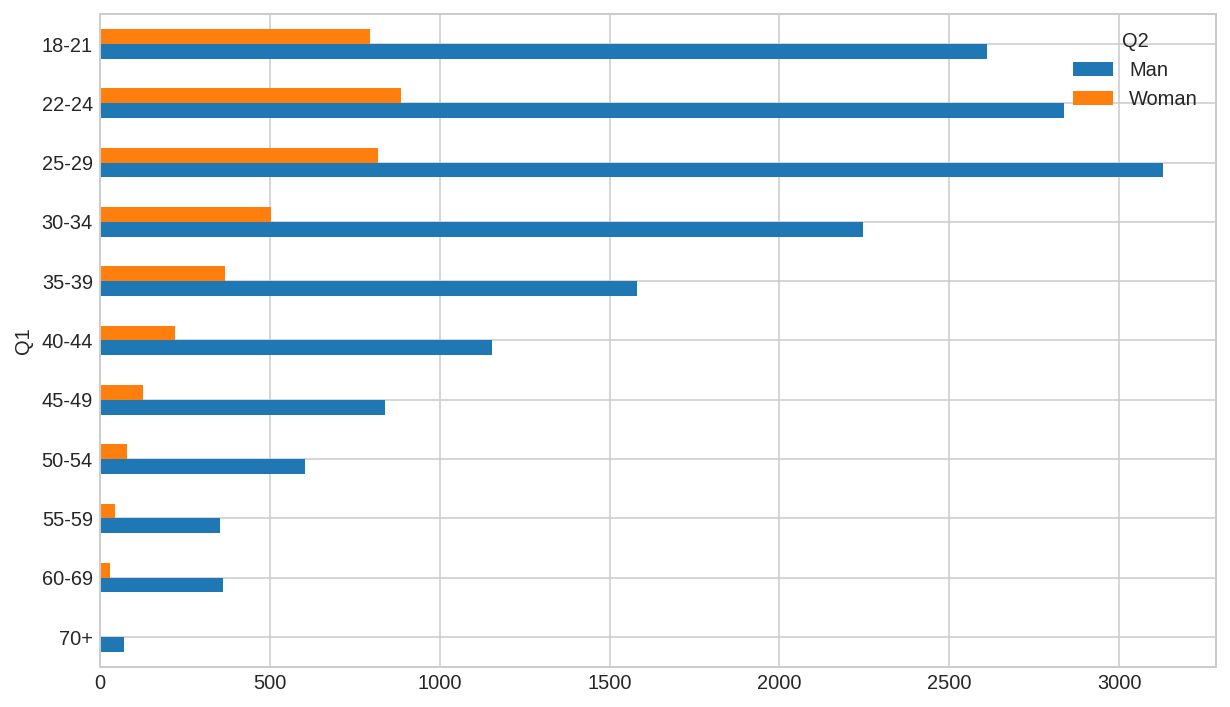

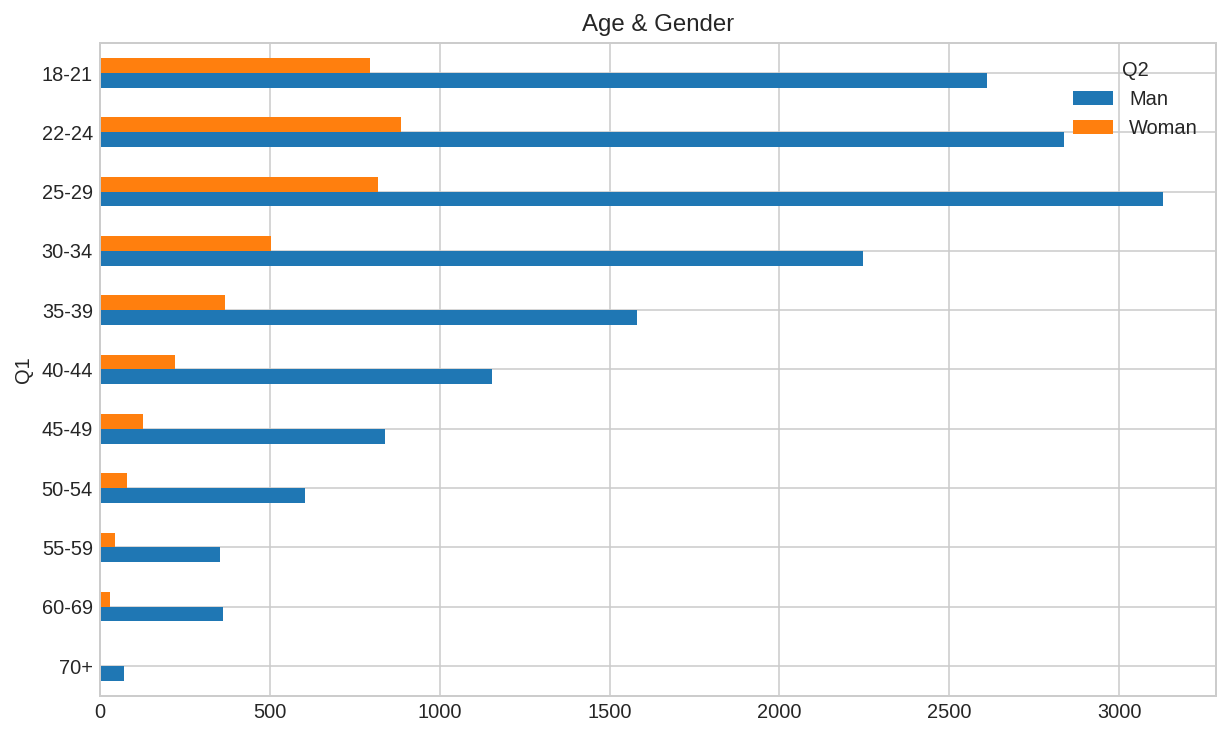

In [28]:
# pandas plot 
q1q2[["Man","Woman"]].plot() # 연속적일 때
q1q2[["Man","Woman"]].plot.bar(rot=0) # 불연속적일 때, rot=0 글자 똑바로
q1q2[["Man","Woman"]].plot.barh() # 가로로
q1q2[["Man","Woman"]].sort_index(ascending=False).plot.barh() # 인덱스 순으로
q1q2[["Man","Woman"]].sort_index(ascending=False).plot.barh(figsize=(10,6)) # 사이즈 조정
q1q2[["Man","Woman"]].sort_index(ascending=False).plot.barh(figsize=(10,6), title="Age & Gender") # 타이틀 지정

Text(0.5, 1.0, 'Age & Gender')

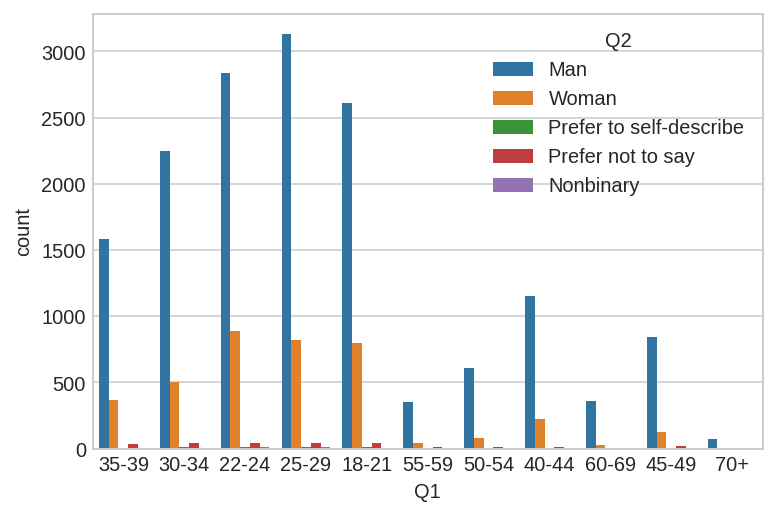

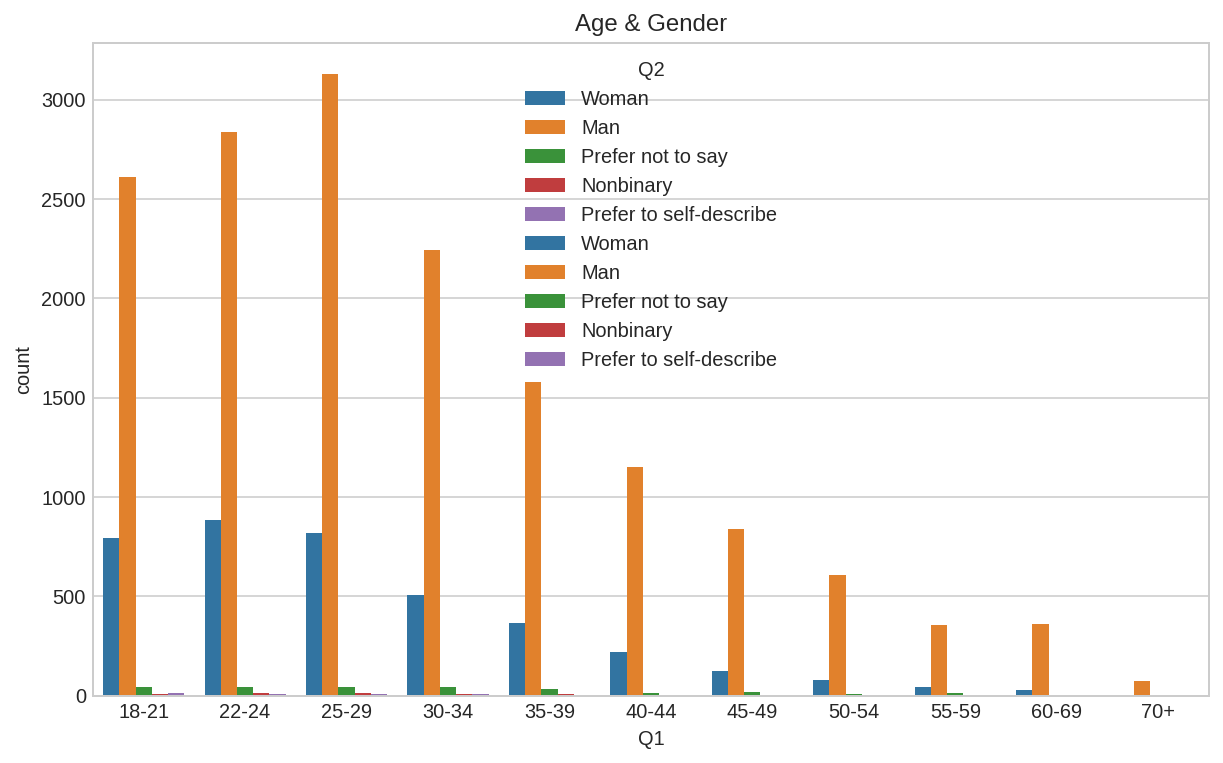

In [29]:
# seaborn으로 그리는 방법
sns.countplot(data=answer, x="Q1", hue="Q2") # hue : Q2에 따라서 색 지정
plt.figure(figsize=(10,6)) # 그래프 사이즈 조정
sns.countplot(data=answer.sort_values("Q1"), x="Q1", hue="Q2") # 연령대로 정렬
sns.countplot(data=answer.sort_values("Q1"), x="Q1", hue="Q2").set_title("Age & Gender") # 타이틀 지정